In [81]:
import scipy.stats as st
import numpy as np
import pandas as pd
import cvxpy as cvx

In [82]:
Sigma = np.array([
    [1.0,  -0.5,  0.6],
    [-0.5,  2.0,  0.8],
    [0.6,   0.8,  3.0]
])

w = np.ones(Sigma.shape[0])[:, np.newaxis]

w.T @ Sigma @ w

array([[7.8]])

In [83]:
def calc_simple_kurtosis(arr):
    N = arr.shape[0]

    return N * ((arr - arr.mean())**4).sum() / (((arr - arr.mean())**2).sum())**2

arr = np.array([12, 13, 54, 56, 25])

calc_simple_kurtosis(arr)

np.float64(1.2278789785238353)

In [84]:
# Non-parametric

def VaR_np(returns_arr, alpha):
    q = np.quantile(returns_arr, alpha)
    return q

def ES_np(returns_arr, alpha):
    returns_arr = pd.Series(returns_arr)
    q = np.quantile(returns_arr, alpha)
    ES_value = returns_arr[returns_arr < q].mean()
    return ES_value

returns_arr = np.array([
    -0.025, -0.028, -0.030, -0.022,  0.005,
     0.012,  0.020,  0.021,  0.022,  0.022,
     0.025,  0.026,  0.026,  0.028,  0.030,
     0.032,  0.037,  0.040,  0.045,  0.049
])

VaR_np(returns_arr, alpha=0.05) * 15e9

np.float64(-421500000.0)

In [85]:
# Parametric

def VaR_p(mu, sigma, alpha):
    q = st.norm.ppf(alpha, loc=mu, scale=sigma)
    return q

def ES_p(mu, sigma, alpha):
    q_s = st.norm.ppf(alpha)
    ES = mu - sigma * (st.norm.pdf(q_s))
    return ES

ES_p(0.0, 0.1, 0.05)

np.float64(-0.010313564037537129)

In [104]:
r_arr = np.array([-2, -1.8, 0, 0.4, 0.6, 1, 1.5, 1.8, 2, 2.2])
r_arr /= 100

mu = r_arr.mean()
std = r_arr.std()


VaR_p(mu, std, alpha=0.1) * 1e7

np.float64(-123516.89885156877)

In [86]:
# Monte Carlo

mean = 0.0
stdev = 0.1

n_sims = 1000000
sim_returns = np.random.normal(mean, stdev, n_sims)
sim_VaR = np.percentile(sim_returns, 1)
print('1-day simulated VaR is ', sim_VaR)

1-day simulated VaR is  -0.23235657305833485


In [ ]:
# Multivariate normal portfolio return
sigma_A = 0.8
sigma_B = 0.6
sigma_C = 0.4

mu = np.array([0.0, 0.0])
Sigma = np.array([
    [sigma_A**2, -0.2*sigma_A*sigma_B],
    [-0.2*sigma_A*sigma_B, sigma_B**2]
])
n_sim = 100000
mult_normal = st.multivariate_normal(mu, Sigma)



In [99]:
# Multivariate normal portfolio return
sigma_A = 0.8
sigma_B = 0.6

mu = np.array([0.0, 0.0])
Sigma = np.array([
    [sigma_A**2, 0.2*sigma_A*sigma_B],
    [0.2*sigma_A*sigma_B, sigma_B**2]
])

w = np.array([0.4, 0.6])[:, np.newaxis]

np.sqrt(w.T @ Sigma @ w)

array([[0.52733291]])

In [88]:
# Multivariate t portfolio return

import numpy as np
from scipy.stats import chi

def multivariate_t_rvs(m, S, df=1, n=1):
    m = np.asarray(m)  # procedure requires a type array
    d = len(m)     # distribution is d-dimensional
    v = np.random.chisquare(df, n)
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z*np.sqrt(df/v)[:,None]

# using the function:
n=5  # number of simulations
df=3 # degrees of freedom
mu = [1, 2, -1]
Omega = [[1, .5, -0.3], [.5, 2, 0], [-0.3, 0, 2]]
simulated_values = multivariate_t_rvs(mu, Omega, df, n)
#######  results:
print(simulated_values)

[[-0.89502674  0.02041604 -1.50871375]
 [ 0.00689386  5.26886024  0.09410081]
 [ 0.84567035  5.10229299 -0.69647107]
 [ 0.27329756  3.63099747 -0.77900482]
 [ 0.97502796 -3.4082795   1.19832241]]


# VaR with time-varying volatility (EWMA method)

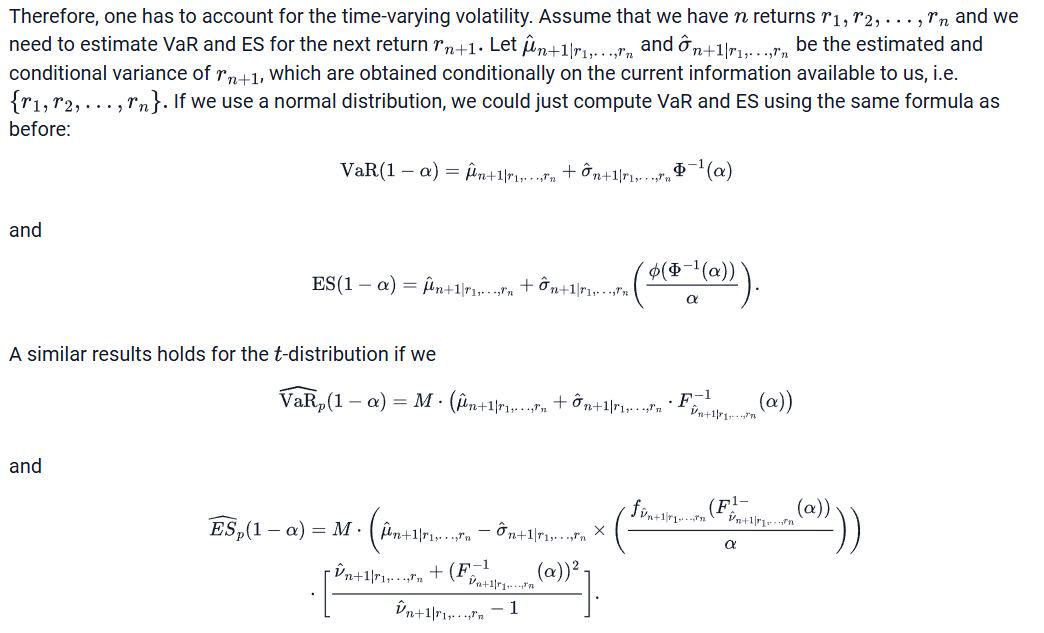

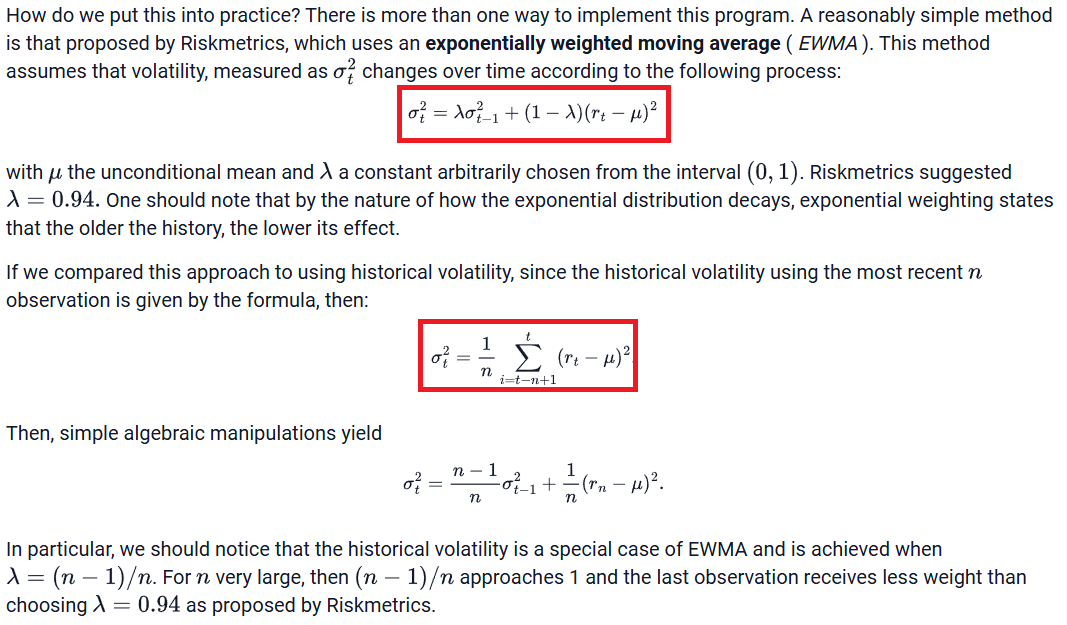

## GARCH application:

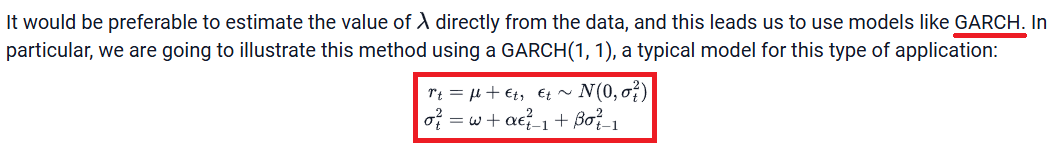

In [89]:
from arch import arch_model

model=arch_model(returns_arr, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 33125028.163287506
Iteration:      2,   Func. Count:     15,   Neg. LLF: -49.72086143624931
Optimization terminated successfully    (Exit mode 0)
            Current function value: -49.72086160119647
            Iterations: 6
            Function evaluations: 15
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                49.7209
Distribution:                  Normal   AIC:                          -91.4417
Method:            Maximum Likelihood   BIC:                          -87.4588
                                        No. Observations:                   20
Date:                Sat, Jul 05 2025   Df Residuals:                       19
Time:         

c:\Users\Atakan\atakan_python\WQU_DL\.venv\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000562. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [90]:
forecasts = results.forecast(horizon=3)
print(forecasts.variance)


         h.1       h.2       h.3
19  0.000533  0.000542  0.000548


In [91]:
model=arch_model(100*returns_arr, vol='Garch', p=1, o=0, q=1, dist='t')
forecasts = results.forecast(horizon=3)
print(forecasts.variance)

         h.1       h.2       h.3
19  0.000533  0.000542  0.000548


# Frontier Portfolio

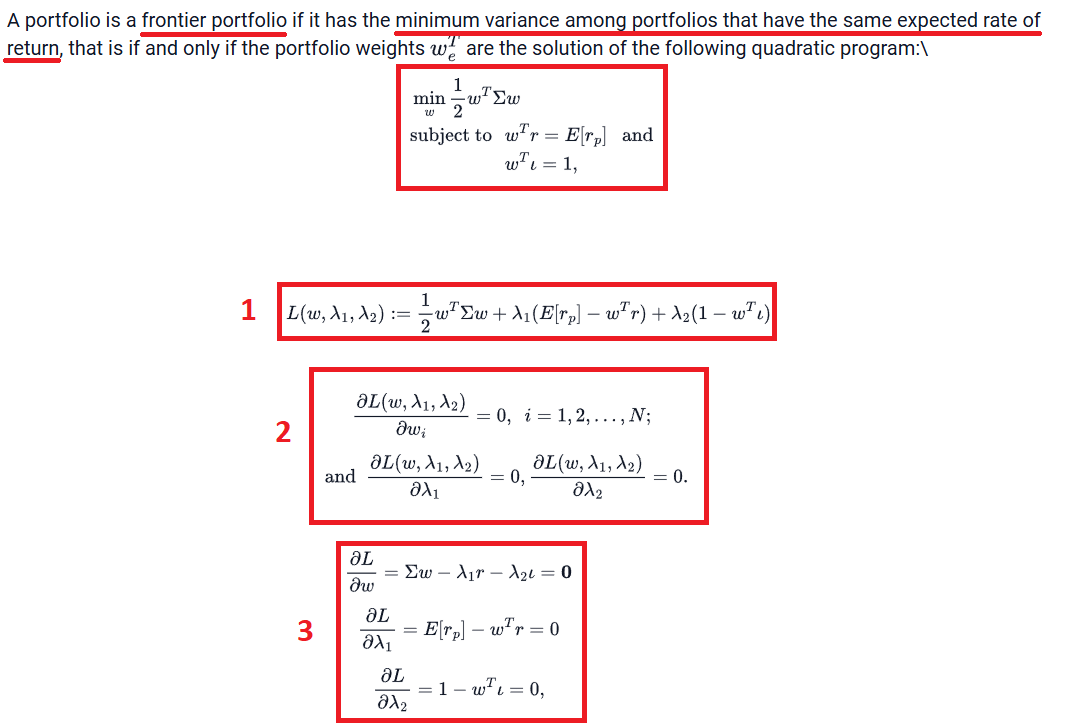

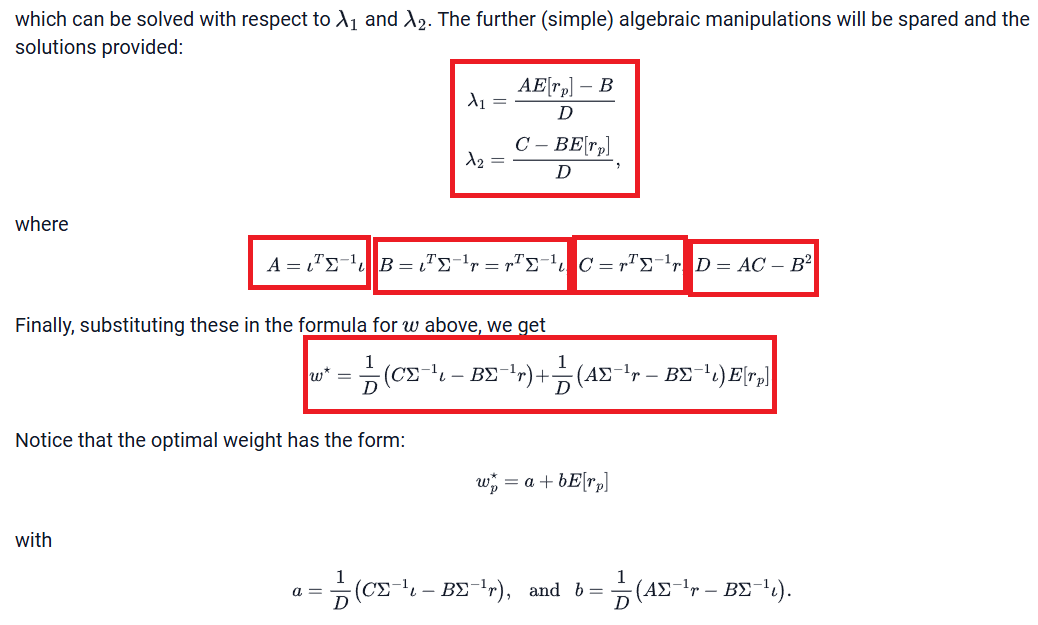

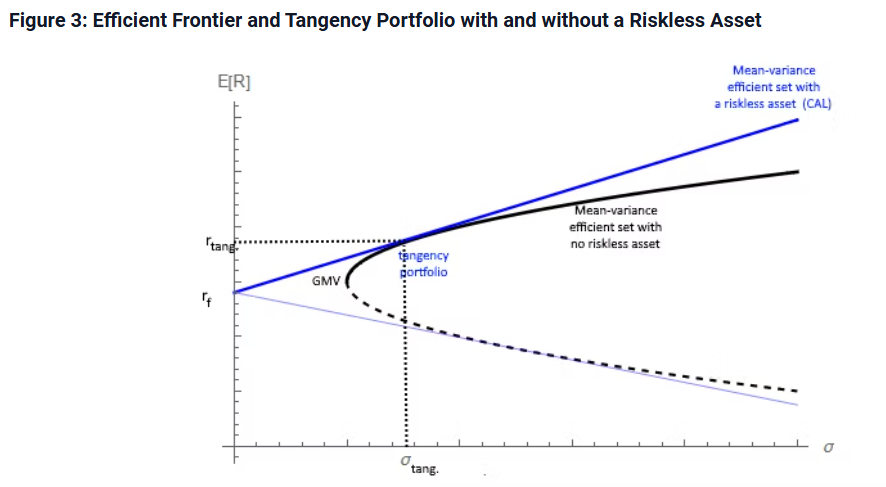

## Quadratic Programming structure

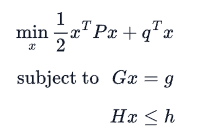

In [92]:
# Global minimum variance
def calc_global_minimum_variance(Sigma):
    N = Sigma.shape[0]
    ones_arr = np.ones(N)

    GMV = 1/(ones_arr.T @ np.linalg.inv(Sigma) @ ones_arr)
    return GMV

In [93]:
Sigma = np.array([
    [1.0,  0.5,  0.4],
    [0.5,  2.0, -0.5],
    [0.4, -0.5,  2.0]
])

calc_global_minimum_variance(Sigma)

np.float64(0.643867924528302)

In [94]:
Sigma_inv = np.array([
    [ 1.43, -0.35, -0.48],
    [-0.35,  0.60,  0.19],
    [-0.48,  0.19,  0.67]
])
ones_arr = np.ones(Sigma_inv.shape[0])
GMV = 1/(ones_arr.T @ Sigma_inv @ ones_arr)
GMV

np.float64(0.704225352112676)

In [95]:
E_U = 1/6 * (29-10)**3 + 1/6 * (5-10)**3 + 4/6 * (-2-10)**3
E_U


-29.666666666666742

In [96]:
def solve_for_wp(r, Sigma, upper_bounds, E_rp):
    """
    Args:
        r (np.array): one-dimensional returns vector of N assets, shape (N, 1)
        Sigma (np.array): Covariance matrix of N assets, shape (N, N)
        upper_bounds (np.array): upper bound on weights, shape (N, 1)
        E_rp (np.array): Expected returns vector for assets, shape (N, 1)
    """
    N = Sigma.shape[0]
    ones_arr = np.ones((N, 1))

    g = np.array([E_rp, 1])[:, np.newaxis]  # shape (2, 1)
    P = Sigma
    G = np.hstack(r, ones_arr)
    h = upper_bounds
    H = ones_arr.T
    q = r

    x = cvx.Variable(r)
    prob = cvx.Problem(cvx.Maximize((-1/2)*cvx.quad_form(x, P) + q.T @ x),
                [H @ x <= h,
                G @ x == g])
    prob.solve()
    #retrieve the weights of the optimized portfolio     
    x_values = x.value

    opt_ptfolio_ret = np.dot(x_values, E_rp)
    print("Expected return optimal porfolio: ", f"{opt_ptfolio_ret:.2%}")

    opt_ptfolio_stdev = np.sqrt(np.dot(x_values, Q.dot(x_values.T)))
    print("Expected std. deviation optimal porfolio: ", f"{opt_ptfolio_stdev:.2%}")


In [97]:
import pandas as pd
import numpy as np
import cvxpy as cvx
import yfinance as yf
from datetime import datetime

## define the stocks for our portfolio (via tickers) ###
assets = ["AAPL", "AMZN","TSLA","GOOGL","META","MSFT","AMGN", "V"]
# Define the start date
start = "2020-03-15"
# Today's date
today = datetime.today().strftime('%Y-%m-%d')
# Acquire data
df_prices = yf.download(assets,start=start,end=today)['Close']

# We transform the data to its logarithmic returns
df = np.log(df_prices).diff()
# Drop the first row because we loose information we the logarithmic return.
df = df.dropna()  # this is a dataframe

# Compute the Expected Returns, we multiply daily return by 252
#because there are 252 business days in the US.
exp_returns = df.mean()*252
cova = df.cov()*252

m=exp_returns.shape[0]

# WANT: optimal portfolio with the following constraints
# 1. no short sales are allowed  that is the weights for all stocks are >=0
# 2. the maximum weight allowed for Amazon is 0.2
# 3. the maxium weight allowed for Tesla is 0.3
# 4. the sum of the weights is 1  
# 5. We need to have a weight of 0.05 for Microsoft
  
#def optimize_portfolio(exp_returns, index_weights, scale=.0000):
Q = np.array(cova)   # Q is variance-covariance matrix of assets
q = np.array(exp_returns) # q is the exptected returns of assets
#   Inequalities are written as Gx <= h
G = np.array(np.matrix([[-1,0,0,0,0,0,0,0],[0,-1,0,0,0,0,0,0], \
                        [0,0,-1,0,0,0,0,0],[0,0,0,-1,0,0,0,0], \
                        [0,0,0,0,-1,0,0,0],[0,0,0,0,0,-1,0,0], \
                        [0,0,0,0,0,0,-1,0],[0,0,0,0,0,0,0,-1], \
                        [0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0]]))
print(G.shape)
h =np.array([0,0,0,0,0,0,0,0,0.2,0.3])
# Equality constraints are written as Ax == b
A = np.array(np.matrix([[1,1,1,1,1,1,1,1],[0,0,0,0,0,1,0,0]]))
                # matrix A is used for the equality constraints 
b = np.array([1, 0.05])    
#
# Define and solve the quadratic problem using CVXPY:
# ===================================================
x = cvx.Variable(m)
prob = cvx.Problem(cvx.Maximize((-1/2)*cvx.quad_form(x, Q) + q.T @ x),
             [G @ x <= h,
              A @ x == b])
prob.solve()
#retrieve the weights of the optimized portfolio     
x_values = x.value
#Print the optimal weights for each asset in the portfolio.
for i in range(m):
        print(assets[i], f"{x_values[i]: f}")

opt_ptfolio_ret = np.dot(x_values, exp_returns)
print("Expected return optimal porfolio: ", f"{opt_ptfolio_ret:.2%}")

opt_ptfolio_stdev = np.sqrt(np.dot(x_values, Q.dot(x_values.T)))
print("Expected std. deviation optimal porfolio: ", f"{opt_ptfolio_stdev:.2%}")


[*********************100%***********************]  8 of 8 completed

(10, 8)
AAPL -0.000000
AMZN  0.000000
TSLA  0.000000
GOOGL  0.000000
META  0.395365
MSFT  0.050000
AMGN  0.554635
V  0.000000
Expected return optimal porfolio:  38.04%
Expected std. deviation optimal porfolio:  46.41%
